#### Import all libraries

In [9]:
from __future__ import print_function
import os
import collections
import SimpleITK as sitk
import numpy as np
import six
import radiomics
from radiomics import firstorder, glcm, imageoperations, shape, glrlm, glszm, getTestCase
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import logging as logger
import time
import json
import os
import logging.config
import pandas as pd
import gc
import math
import matplotlib.pyplot as plt

#### Function to change the discritization of the images

In [45]:
def change_discretization(im_arr, s):
    "This function is used to change the discretization of the images used"

    min_intensity = np.amin(im_arr)
    max_intensity = np.amax(im_arr)
    
    im_requantized = (2**6) * (im_arr - min_intensity)/(max_intensity - min_intensity + 1)
    #im_requantized = np.floor(im_requantized)
    
    return im_requantized

#### Read the image in NRRD format and then use pyRadiomics library to change it to an array format

In [48]:
image_1 = sitk.ReadImage('D:\\Ankita PhD\\pyradiomics\\data\\sandpack_nrrd_16bit_800cube.nrrd') #the image is in SITK format
im_to_change = sitk.GetArrayFromImage(image_1) #get array from image (SITK Format)

In [49]:
im_to_change.shape

(800, 800, 800)

In [50]:
np.amax(im_to_change)

52799

In [51]:
np.amin(im_to_change)

8814

In [52]:
type(im_to_change)

numpy.ndarray

In [53]:
#The multidimensional array needs to be reduced to a 1D array before plotting in matplotlib
x = im_to_change.flatten(order = 'C')
x.size

512000000

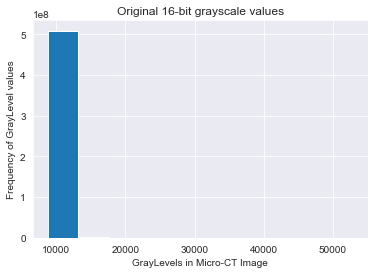

In [58]:
plt.hist(x)
plt.ylabel('Frequency of GrayLevel values')
plt.xlabel('GrayLevels in Micro-CT Image')
plt.title('Original 16-bit grayscale values')
plt.show()

In [55]:
discretized_image = change_discretization(im_to_change,6)

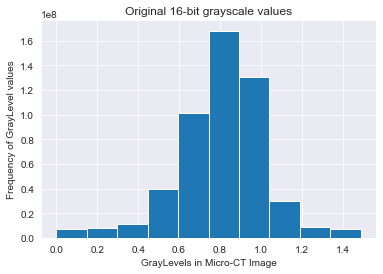

In [57]:
plt.hist(discretized_image.flatten(order = 'C'))
plt.ylabel('Frequency of GrayLevel values')
plt.xlabel('GrayLevels in Micro-CT Image')
plt.title('Original 16-bit grayscale values')
plt.show()

In [42]:
np.unique(discretized_image)

array([0.00000000e+00, 4.57731369e-03, 9.15462738e-03, ...,
       4.67343728e+00, 4.67801459e+00, 4.68259190e+00])

In [44]:
2**6

64